In [ ]:
# Content available in page https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/
#Hits from my dissertation and PhD
#https://repositorio.ufpe.br/handle/123456789/5864
#https://repositorio.ufpe.br/handle/123456789/4950
# PACKAGE INSTALLATION AND LOADING
# !pip install pgmpy

In [1]:
# from pgmpy.model2s import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
# import pylab as plt
import matplotlib.pyplot as plt

In [2]:
# Defining Bayesian Structure
# arcs from the cause to the effect
model = BayesianNetwork([('hasKnowledgment', 'correctAnswer_Q01')])

In [3]:
# Defining the CPDs:
# PRIORS
cpd_hasKnowledgment = TabularCPD(variable='hasKnowledgment',
                                 variable_card=2, values=[[.5], [.5]], state_names={"hasKnowledgment": ["YES", "NO"]})  # 0- yes, 1-no
print(cpd_hasKnowledgment)

+----------------------+-----+
| hasKnowledgment(YES) | 0.5 |
+----------------------+-----+
| hasKnowledgment(NO)  | 0.5 |
+----------------------+-----+


In [4]:
# LIKELIHOODS: mede o poder de causa e efeito entre as váriaveis
cpd_correctAnswer_Q01 = TabularCPD(variable='correctAnswer_Q01',
                                   variable_card=2, values=[[.9, .25],  # 0- yes, 1-no
                                                            [.1, .75]],
                                   evidence=['hasKnowledgment'], evidence_card=[2],
                                   state_names={"hasKnowledgment": ["YES", "NO"],
                                                "correctAnswer_Q01": ["YES", "NO"]})
print(cpd_correctAnswer_Q01)

+------------------------+----------------------+---------------------+
| hasKnowledgment        | hasKnowledgment(YES) | hasKnowledgment(NO) |
+------------------------+----------------------+---------------------+
| correctAnswer_Q01(YES) | 0.9                  | 0.25                |
+------------------------+----------------------+---------------------+
| correctAnswer_Q01(NO)  | 0.1                  | 0.75                |
+------------------------+----------------------+---------------------+


In [5]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_hasKnowledgment, cpd_correctAnswer_Q01)
model.check_model()

True

StopIteration: 

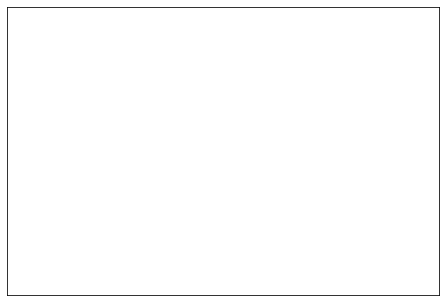

In [6]:
# PLOT THE MODEL
nx.draw(model, with_labels=True)
plt.show()
# plt.savefig('BBN_model.png')
# plt.close()

In [9]:
# BBN (for qualitative analysis)
# COMPUTING THE POSTERIOR/MARGINAL DISTRIBUTIONS

infer = VariableElimination(model)
posterior_p = infer.query(['hasKnowledgment'], evidence={
                          'correctAnswer_Q01': 'YES'})
print(posterior_p)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----------------------+------------------------+
| hasKnowledgment      |   phi(hasKnowledgment) |
+======================+========================+
| hasKnowledgment(YES) |                 0.7826 |
+----------------------+------------------------+
| hasKnowledgment(NO)  |                 0.2174 |
+----------------------+------------------------+


In [11]:
# INVOLVING A SECOND QUESTION, MORE DIFFICULT TO ANSWER...
model2 = BayesianNetwork([('hasKnowledgment', 'correctAnswer_Q01'),
                          ('hasKnowledgment', 'correctAnswer_Q02')])  # arcs from the cause to the effect
# Defining the CPDs:
# PRIORS
cpd_hasKnowledgment = TabularCPD(variable='hasKnowledgment',
                                 variable_card=2, values=[[.5], [.5]], state_names={"hasKnowledgment": ["YES", "NO"]})  # 0- yes, 1-no
print(cpd_hasKnowledgment)
# LIKELIHOODS
cpd_correctAnswer_Q01 = TabularCPD(variable='correctAnswer_Q01',
                                   variable_card=2, values=[[.9, .25],  # 0- yes, 1-no
                                                            [.1, .75]],
                                   evidence=['hasKnowledgment'], evidence_card=[2],
                                   state_names={"hasKnowledgment": ["YES", "NO"],
                                                "correctAnswer_Q01": ["YES", "NO"]})
print(cpd_correctAnswer_Q01)
cpd_correctAnswer_Q02 = TabularCPD(variable='correctAnswer_Q02',
                                   variable_card=2, values=[[.9, .25],  # 0- yes, 1-no
                                                            [.1, .75]],
                                   evidence=['hasKnowledgment'], evidence_card=[2],
                                   state_names={"hasKnowledgment": ["YES", "NO"],
                                                "correctAnswer_Q02": ["YES", "NO"]})
print(cpd_correctAnswer_Q02)
# Associating the CPDs with the network structure.
model2.add_cpds(cpd_hasKnowledgment, cpd_correctAnswer_Q01,
                cpd_correctAnswer_Q02)
model2.check_model()
# BBN (for qualitative analysis)
# COMPUTING THE POSTERIOR/MARGINAL DISTRIBUTIONS
# from pgmpy.inference import VariableElimination

infer = VariableElimination(model2)
posterior_p2 = infer.query(['hasKnowledgment'], evidence={
                           'correctAnswer_Q01': 'YES', 'correctAnswer_Q02': 'YES'})
print(posterior_p2)

+----------------------+-----+
| hasKnowledgment(YES) | 0.8 |
+----------------------+-----+
| hasKnowledgment(NO)  | 0.2 |
+----------------------+-----+
+------------------------+----------------------+---------------------+
| hasKnowledgment        | hasKnowledgment(YES) | hasKnowledgment(NO) |
+------------------------+----------------------+---------------------+
| correctAnswer_Q01(YES) | 0.9                  | 0.25                |
+------------------------+----------------------+---------------------+
| correctAnswer_Q01(NO)  | 0.1                  | 0.75                |
+------------------------+----------------------+---------------------+
+------------------------+----------------------+---------------------+
| hasKnowledgment        | hasKnowledgment(YES) | hasKnowledgment(NO) |
+------------------------+----------------------+---------------------+
| correctAnswer_Q02(YES) | 0.9                  | 0.25                |
+------------------------+----------------------+----

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----------------------+------------------------+
| hasKnowledgment      |   phi(hasKnowledgment) |
+======================+========================+
| hasKnowledgment(YES) |                 0.0664 |
+----------------------+------------------------+
| hasKnowledgment(NO)  |                 0.9336 |
+----------------------+------------------------+
